<a href="https://colab.research.google.com/github/HegdeChaitra/speech/blob/master/random_forest_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("jfk_weather_cleaned.csv")

In [0]:
df['DATE']=pd.to_datetime(df['DATE'])

In [26]:
df.columns

Index(['DATE', 'VISIBILITY', 'DRYBULBTEMPF', 'WETBULBTEMPF', 'DewPointTempF',
       'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure',
       'SeaLevelPressure', 'Precip'],
      dtype='object')

In [0]:
df['month'] = df['DATE'].dt.month

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
set_x = ['VISIBILITY',
       'RelativeHumidity', 'WindSpeed', 'WindDirection', 'StationPressure',
       'SeaLevelPressure', 'Precip', 'month']

In [0]:
set_y = ['DRYBULBTEMPF']

In [0]:
df = df.sample(frac=1.0).reset_index().drop(labels=['index'], axis=1)

In [32]:
df.shape

(75083, 12)

In [33]:
75083*0.8

60066.4

In [0]:
train = df.iloc[:60066]

In [0]:
val = df.iloc[60066:]

In [0]:
rf = RandomForestRegressor(min_samples_leaf=10, min_samples_split=20)

In [40]:
rf.fit(train[set_x], train[set_y]);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
predictions = rf.predict(val[set_x])

In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [44]:
metrics.r2_score(val[set_y], predictions)

0.8852592893459398

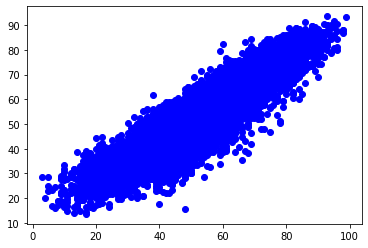

In [47]:
plt.plot(val[set_y], predictions,'bo')

In [0]:
def plotfeatureimportances(train, importance):
    '''Plots feature importance in a sorted order and shows the most significant variables at the top'''
    X = list(train.columns)
    # X.remove('y_yes')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')

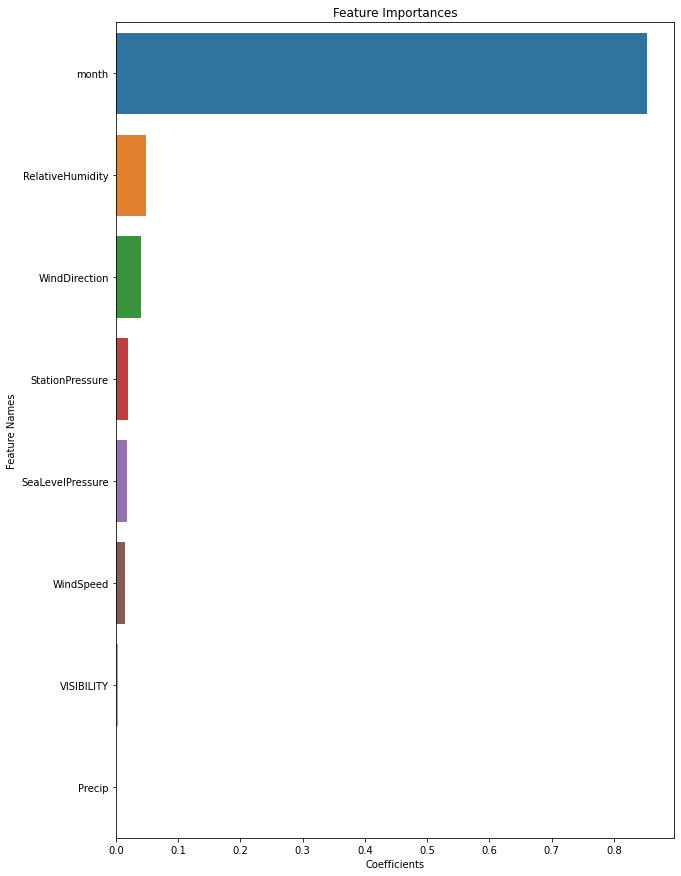

In [56]:
plotfeatureimportances(train[set_x],rf.feature_importances_)

In [53]:
train[set_x]

,VISIBILITY,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip,month
0,10.0,35,9,320,29.92,29.94,0.0,7
1,10.0,57,6,40,30.00,30.02,0.0,7
2,10.0,83,17,30,30.20,30.22,0.0,10
3,7.0,85,14,260,29.47,29.49,0.0,1
4,10.0,49,14,10,30.04,30.06,0.0,11
...,...,...,...,...,...,...,...,...
60061,10.0,74,10,190,30.07,30.09,0.0,7
60062,10.0,77,10,270,29.74,29.76,0.0,11
60063,4.0,96,3,20,29.92,29.95,0.0,11
60064,10.0,32,17,300,29.62,29.65,0.0,3


## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

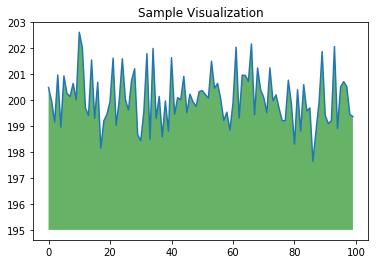

In [0]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [AI Hub](https://aihub.cloud.google.com/) project.

A few featured examples:

- [Neural Style Transfer](https://aihub.cloud.google.com/p/products%2F7f7495dd-6f66-4f8a-8c30-15f211ad6957): Use deep learning to transfer style between images.
- [EZ NSynth](https://aihub.cloud.google.com/p/products%2Fcddd17cf-5f86-4ce7-b6b6-03c5e52ee0fb): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://aihub.cloud.google.com/p/products%2F7a0acf15-0be0-41a6-9bdb-5a5abd4e8fbf): Classify fashion-related images with deep learning.
- [DeepDream](https://aihub.cloud.google.com/p/products%2Ff9e8fc11-ad0f-410a-bebe-2482066ce570): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://aihub.cloud.google.com/p/products%2Ff5e8dd20-6b34-44a0-bc45-6e345e36a4e7): Create a generative model of handwritten digits.